# Word vectors

In [2]:
!pip install spacy

     ---------------------------------------- 11.7/11.7 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 42.8/42.8 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 94.7/94.7 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 448.0/448.0 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 58.6/58.6 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 7.4/7.4 MB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
!python -m spacy download en_core_web_lg

     -------------------------------------- 587.7/587.7 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [4]:
import spacy

nlp = spacy.load('en_core_web_lg')

c:\Users\opell\anaconda3\envs\KDP\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
doc = nlp("NLP is awesome")
doc

NLP is awesome

In [7]:
print(nlp.pipeline)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x000001CC3CEAF7C0>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x000001CC3CEAF640>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x000001CC3CDCC7B0>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x000001CC3D09D9C0>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x000001CC3D0C3440>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x000001CC3CDCC9E0>)]


In [8]:
for token in doc:
    print(token.text, token.pos_)

NLP NOUN
is AUX
awesome ADJ


In [10]:
doc[0]

NLP

In [11]:
doc[0].vector

array([-1.4488e+00,  8.1959e-01,  7.1514e+00,  6.5645e-01,  2.1112e+00,
        1.4380e+00,  2.6703e+00,  5.2665e-01, -2.4186e+00, -2.6855e-01,
        3.6280e+00,  2.3172e-01, -2.4559e+00, -8.4527e-01,  9.4456e-01,
       -1.5066e+00,  5.5113e+00,  3.4182e+00,  9.3467e-01, -1.5189e+00,
       -5.4357e+00,  2.8662e+00, -2.6999e-01,  1.8631e+00,  9.2688e-01,
       -5.6016e-01,  1.0905e+00, -9.4990e-01, -7.5683e-01, -2.3267e-01,
       -4.4821e+00, -2.4060e+00, -4.3373e+00, -5.6129e-01, -8.4552e-01,
       -3.3398e+00, -4.7541e-01,  2.1119e-01,  5.7403e-01, -8.8212e-01,
       -3.7534e-01, -1.9162e-01, -2.2510e-01,  6.0718e-01, -3.0815e+00,
        1.9564e+00,  1.3342e+00,  2.3118e+00, -9.3553e-01, -6.0177e+00,
        7.1316e-01, -1.4865e+00,  1.9488e+00, -2.7439e+00, -1.9600e+00,
        3.2526e-01, -3.9822e+00, -8.1215e-01,  1.8519e-01,  9.2472e-01,
        2.3251e+00,  5.6535e+00, -1.0778e+00,  6.0109e+00,  1.5149e+00,
        2.9027e+00,  1.0194e+00, -5.2549e+00, -1.1270e+00, -3.89

In [12]:
doc[0].vector.shape

(300,)

In [13]:
doc[0]

NLP

In [14]:
doc[0].similarity(nlp("apple"))

0.04177408853929746

In [15]:
def preprocess(word):
    return nlp(word) if type(word) == str else word

In [16]:
def similarity(word1, word2):
    word1_processed = preprocess(word1)
    word2_processed = preprocess(word2)

    return word1_processed.similarity(word2_processed)

In [17]:
similarity("apple", "iron")

0.22432187007915919

In [18]:
similarity("apple", "banana")

0.6646700829971469

In [19]:
similarity("apple", "tree")

0.4748513311632303

In [20]:
len(nlp.vocab)

770

In [21]:
def get_similar_words(word, n=5):
    word_processed = preprocess(word)

    return sorted([(w.text, word_processed.similarity(w)) for w in nlp.vocab if not w.text == word], key=lambda x: x[1], reverse=True)[:n]

In [22]:
get_similar_words("apple")

C:\Users\opell\AppData\Local\Temp\ipykernel_26136\1258224466.py:4: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return sorted([(w.text, word_processed.similarity(w)) for w in nlp.vocab if not w.text == word], key=lambda x: x[1], reverse=True)[:n]


[('banana', 0.6646701044892316),
 ('tree', 0.47485133693470405),
 ('somethin', 0.3638980905718291),
 ('somethin’', 0.36182656862323337),
 ('it', 0.35645755265569856)]

In [23]:
get_similar_words("king")

C:\Users\opell\AppData\Local\Temp\ipykernel_26136\1258224466.py:4: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return sorted([(w.text, word_processed.similarity(w)) for w in nlp.vocab if not w.text == word], key=lambda x: x[1], reverse=True)[:n]


[('that', 0.4336161649178943),
 ('r.', 0.4104969258231927),
 ("there's", 0.3824636279612441),
 ('that’s', 0.3767074928394765),
 ('there', 0.3713808551276863)]

In [24]:
get_similar_words("cute")

C:\Users\opell\AppData\Local\Temp\ipykernel_26136\1258224466.py:4: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return sorted([(w.text, word_processed.similarity(w)) for w in nlp.vocab if not w.text == word], key=lambda x: x[1], reverse=True)[:n]


[('awesome', 0.5707149998675046),
 ('lovin’', 0.4617219807870169),
 (':)', 0.4368965135273402),
 ('lovin', 0.40581818923123614),
 ("lovin'", 0.39599886980606946)]

In [25]:
king = nlp.vocab["king"].vector
queen = nlp.vocab["queen"].vector
man = nlp.vocab["man"].vector

what_is_this = king - man + queen

what_is_this

array([ 3.34074020e+00, -3.08738995e+00, -2.88100004e+00, -1.69709992e+00,
        4.73387003e+00,  1.33077002e+00, -5.06017017e+00,  1.76971984e+00,
       -1.11481011e+00, -6.21999741e-01,  1.81067009e+01, -2.63325024e+00,
       -7.16613007e+00,  2.06383967e+00, -3.11339736e-01, -1.45500004e+00,
        1.64300001e+00,  3.09140015e+00,  9.71500039e-01, -9.25306988e+00,
       -8.23252964e+00, -8.63244915e+00, -1.54496014e+00,  1.43825998e+01,
       -1.21556687e+00,  1.33922982e+00,  3.10234976e+00, -6.70313895e-01,
       -1.17376995e+00,  8.91779900e-01,  1.43960989e+00, -8.76681995e+00,
       -3.03450048e-01, -7.94966984e+00,  7.61654997e+00, -8.41329992e-01,
        7.41940975e+00, -2.12102234e-02,  4.52541018e+00, -2.50420094e-01,
        4.19232988e+00,  6.75835967e-01, -3.96795011e+00,  2.45739985e+00,
        3.14150095e-01,  1.59208000e+00,  1.09319997e+00,  2.92869997e+00,
        1.74620008e+00, -5.08524990e+00, -7.72959995e+00, -1.88809991e+00,
       -1.52680302e+00, -

In [26]:
from scipy import spatial

def cosine_similarity(v, u):
    return 1 - spatial.distance.cosine(v, u)

similarities = {}

for word in nlp.vocab:
    if word.is_alpha:
        similarities[word.text] = cosine_similarity(what_is_this, word.vector)



c:\Users\opell\anaconda3\envs\KDP\lib\site-packages\scipy\spatial\distance.py:620: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [27]:
sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:5]

[('nuthin', 1), ('xDD', 1), ('Nuthin', 1), ('XDD', 1), ('Nebr', 1)]

## Visualizing word vectors

In [28]:
nlp.vocab.vectors.data.shape

(514157, 300)

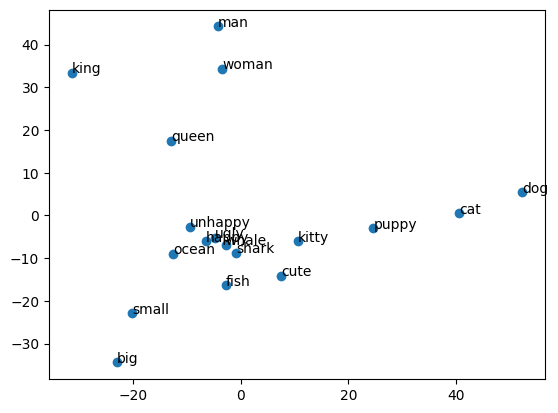

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

WORDS = ["happy", "unhappy", "cute", "ugly", "big", "small", "king", "man", "queen", "woman", "puppy", "dog", "kitty", "cat", "whale", "shark", "fish", "ocean"]

data = []
data_annotation = []

for v in nlp.vocab.vectors:
    word = nlp.vocab[v]

    if word in WORDS:
        data.append(word.vector)
        data_annotation.append(word.lower_)
#data = np.array([word.vector for word in nlp.vocab if word.lower_ in WORDS])


pca = PCA(n_components=2)
reduced_dims = pca.fit_transform(data)

fig, ax = plt.subplots()
ax.scatter(reduced_dims[:, 0], reduced_dims[:, 1])

vocabulary = list(nlp.vocab.strings)

for i in range(len(data)):
    ax.annotate(data_annotation[i], (reduced_dims[i, 0], reduced_dims[i, 1]))